In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table 
from matplotlib.pyplot import figure

In [35]:
data = pd.read_csv('./df_evaluations_genre/drama_ge') 

In [36]:
data1 = pd.read_csv('./df_evaluations_genre/drama_stars_ge')

In [37]:
data2 = pd.read_csv('./df_evaluations_genre/df_action_sp_ge')

In [38]:
df1 = pd.read_csv('./df_evaluations_genre/df_drama_ge_classifier_user_number')
df1 = df1.rename(columns = {"film_name_drama_ge":"film_name","stars_classifier_drama_ge":"stars_classifier","stars_user_drama_ge":"stars_user"})
df2 = pd.read_csv('./df_evaluations_genre/df_comedy_ge_classifier_user_number')
df3 = pd.read_csv('./df_evaluations_genre/df_action_ge_classifier_user_number')

In [39]:
comparison_classifier_user_ge = pd.concat([df1,df2,df3], axis = 0, )

In [40]:
comparison_classifier_user_ge

,film_name,stars_classifier,stars_user,number_of_comments
0,Der Pate,4.2,4.5,49
1,Die Verurteilten,4.4,4.8,46
2,Forrest Gump,4.6,4.8,48
3,Der Pate II,3.6,4.5,26
4,Fight Club,4.2,4.6,63
...,...,...,...,...
95,Star Trek Die Zukunft hat begonnen,3.7,3.7,71
96,Pokémon Meisterdetektiv Pikachu,3.8,4.2,34
97,Die Abenteuer von Tim und Struppi Das Geheimni...,3.8,3.9,50
98,Black Panther,3.5,3.4,50


In [41]:
sum_german_comments = comparison_classifier_user_ge['number_of_comments'].sum()
sum_german_comments

11199

In [42]:
comparison_classifier_user_ge['difference'] = comparison_classifier_user_ge['stars_classifier'] - comparison_classifier_user_ge['stars_user']

In [43]:
comparison_classifier_user_ge['difference'].describe()

count    300.000000
mean      -0.189667
std        0.420057
min       -1.700000
25%       -0.400000
50%       -0.200000
75%        0.000000
max        2.100000
Name: difference, dtype: float64

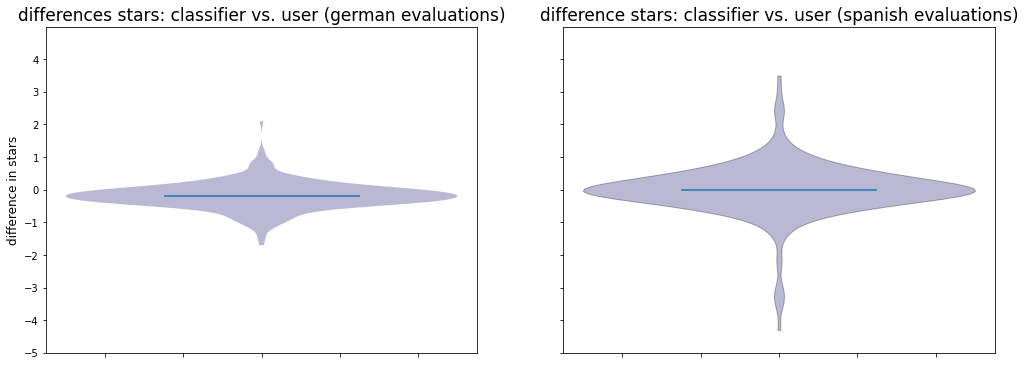

In [51]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 6), sharey = True )

ax1.set_title('differences stars: classifier vs. user (german evaluations)', fontsize = 17)
ax1.set_ylabel('difference in stars',  fontsize = 12 )
ax1.set_yticks(np.arange(-5, 5, 1))
ax1.set_ylim(-5,5)
ax1.set_xticklabels([])
part = ax1.violinplot(comparison_classifier_user_ge['difference'], showmeans = True, showextrema = False)
for pc in part['bodies']:
    pc.set_facecolor('midnightblue')
   
ax2.set_title('difference stars: classifier vs. user (spanish evaluations)', fontsize = 17)

ax2.set_yticks(np.arange(-5, 5, 1))
ax2.set_ylim(-5,5)
ax2.set_xticklabels([])
parts = ax2.violinplot(
        comparison_classifier_user_sp['difference'], showmeans=True, showmedians=False,
        showextrema=False)
for pc in parts['bodies']:
    pc.set_facecolor('midnightblue')
    pc.set_edgecolor('black')

plt.savefig('./charts/violinplot_classifier_user.png')


In [44]:
df1 = pd.read_csv('./df_evaluations_genre/df_drama_sp_classifier_user_number')
df1 = df1.rename(columns = {"film_name_drama_sp":"film_name","stars_classifier_drama_sp":"stars_classifier","stars_user_drama_sp":"stars_user"})
df2 = pd.read_csv('./df_evaluations_genre/df_comedy_sp_classifier_user_number')
df3 = pd.read_csv('./df_evaluations_genre/df_action_sp_classifier_user_number')

In [45]:
comparison_classifier_user_sp = pd.concat([df1,df2,df3], axis = 0, )

In [46]:
comparison_classifier_user_sp

,film_name,stars_classifier,stars_user,number_of_comments
0,El padrino,4.6,4.8,64
1,Siempre a tu lado Hachiko,4.2,4.8,32
2,En busca de la felicidad,4.1,3.8,25
3,After En mil pedazos,3.2,4.1,36
4,La vida es bella,4.4,4.3,35
...,...,...,...,...
95,Los juegos del hambre En llamas,3.7,2.5,11
96,V de Vendetta,4.0,3.8,88
97,Van Helsing,4.7,3.9,66
98,Piratas del Caribe La venganza de Salazar,3.4,3.6,31


In [47]:
sum_spanish_comments = comparison_classifier_user_sp['number_of_comments'].sum()
sum_spanish_comments

8827

In [48]:
comparison_classifier_user_sp['difference'] = comparison_classifier_user_sp['stars_classifier'] - comparison_classifier_user_sp['stars_user']

In [49]:
comparison_classifier_user_sp['difference'].describe()

count    300.000000
mean       0.005000
std        0.825153
min       -4.300000
25%       -0.300000
50%        0.000000
75%        0.400000
max        3.500000
Name: difference, dtype: float64

In [33]:
d = {'german_evaluations': ['300 (11199)', -0.14, 0.57, -3.9,2.1, -0.4, -0.2, 0.1], 'spanish_evaluations': ['300 (8827)',-0.005, 0.8, -4.3,3.5, -0.30, 0.0, 0.4]}
metrics = ['number_of_films (number of user critics)','mean (difference: classifier - user)', 
           'std (difference: classifier - user)', 'min value: (difference: classifier - user)', 'max value: (difference: classifier - user)', '25% quantile', 
          '50% quantile', '75% quantile']
df = pd.DataFrame(data=d, index = metrics )


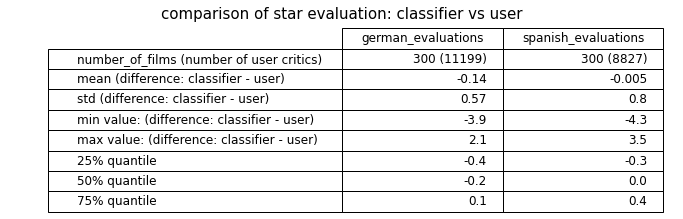

In [52]:


fig, ax = plt.subplots(figsize=(12, 3)) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_title('comparison of star evaluation: classifier vs user', fontsize = 15)
ax.set_frame_on(False)  
tabla = table(ax, df, loc='upper right', colWidths=[0.20]*len(df.columns)) 
tabla.auto_set_font_size(False) 
tabla.set_fontsize(12) 
tabla.scale(1.2, 1.7) 
plt.savefig('./charts/table_classifier_user_comparison.png', transparent=True)


In [72]:
d = {'drama': [data_drama_sp['stars_classifier'].mean().round(1), data_drama_ge['stars_classifier_drama_ge'].mean().round(1), len(data_drama), data_drama['stars_classifier.1'].mean().round(1),
               data_drama['stars_classifier'].mean().round(1)], 'comedy': [data_comedy_sp['stars_classifier'].mean().round(1),data_comedy_ge['stars_classifier'].mean().round(1),
                                                                           len(data_comedy),data_comedy['stars_classifier.1'].mean().round(1),data_comedy['stars_classifier'].mean().round(1)],
             'action':[data_action_sp['stars_classifier'].mean().round(1), data_action_ge['stars_classifier'].mean().round(1), len(data_action),data_action['stars_classifier.1'].mean().round(1), data_action['stars_classifier'].mean().round(1)]}
metrics = ['mean_evaluation_top100_sp', 'mean_evaluation_top100_ge', 'number_of_common_films(sp&ge)_among_top_100',
           'mean_evaluation_common_films_sp', 'mean_evaluation_common_films_ge']
df = pd.DataFrame(data=d, index = metrics )


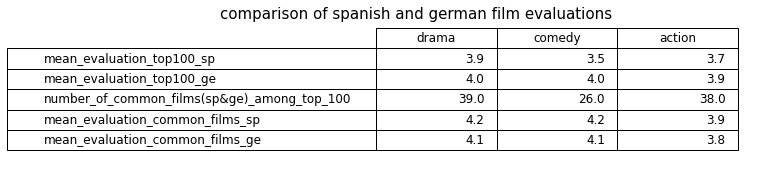

In [69]:
fig, ax = plt.subplots(figsize=(12, 3)) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_title('comparison of spanish and german film evaluations', fontsize = 15)
ax.set_frame_on(False)  
tabla = table(ax, df, loc='upper right', colWidths=[0.15]*len(df.columns)) 
tabla.auto_set_font_size(False) 
tabla.set_fontsize(12) 
tabla.scale(1.2, 1.7) 
plt.savefig('./charts/table_comparison_of_spanish_and_german_film_evaluations.png', transparent=True)


In [64]:
data_action = pd.read_csv('./df_evaluations_genre/df_action_sp_ge')

In [65]:
data_comedy = pd.read_csv('./df_evaluations_genre/df_comedy_sp_ge')

In [66]:
data_drama = pd.read_csv('./df_evaluations_genre/df_drama_sp_ge')

In [57]:
data_drama_ge = pd.read_csv('./df_evaluations_genre/df_drama_ge_classifier_user_number')

In [58]:
data_drama_sp = pd.read_csv('./df_evaluations_genre/df_drama_sp_classifier_user_number')

In [59]:
data_comedy_ge = pd.read_csv('./df_evaluations_genre/df_comedy_ge_classifier_user_number')

In [60]:
data_comedy_sp = pd.read_csv('./df_evaluations_genre/df_comedy_sp_classifier_user_number')

In [61]:
data_action_ge = pd.read_csv('./df_evaluations_genre/df_action_ge_classifier_user_number')

In [62]:
data_action_sp = pd.read_csv('./df_evaluations_genre/df_action_sp_classifier_user_number')

In [2]:
f = 'df_drama_sp_ge'
df_drama_sp_ge = pd.read_csv(f'./df_evaluations_genre/{f}')
df_drama_sp_ge['film_name_sp_ge'] = df_drama_sp_ge['film_name.1'] + ' - ' + df_drama_sp_ge['film_name']
df_drama_sp_ge = df_drama_sp_ge.rename(columns={'stars_classifier.1': 'stars_classifier_sp', 'number_comments.1':'number_comments_sp'})
df_drama_sp_ge = df_drama_sp_ge.sort_values('stars_classifier_sp', ascending=True)

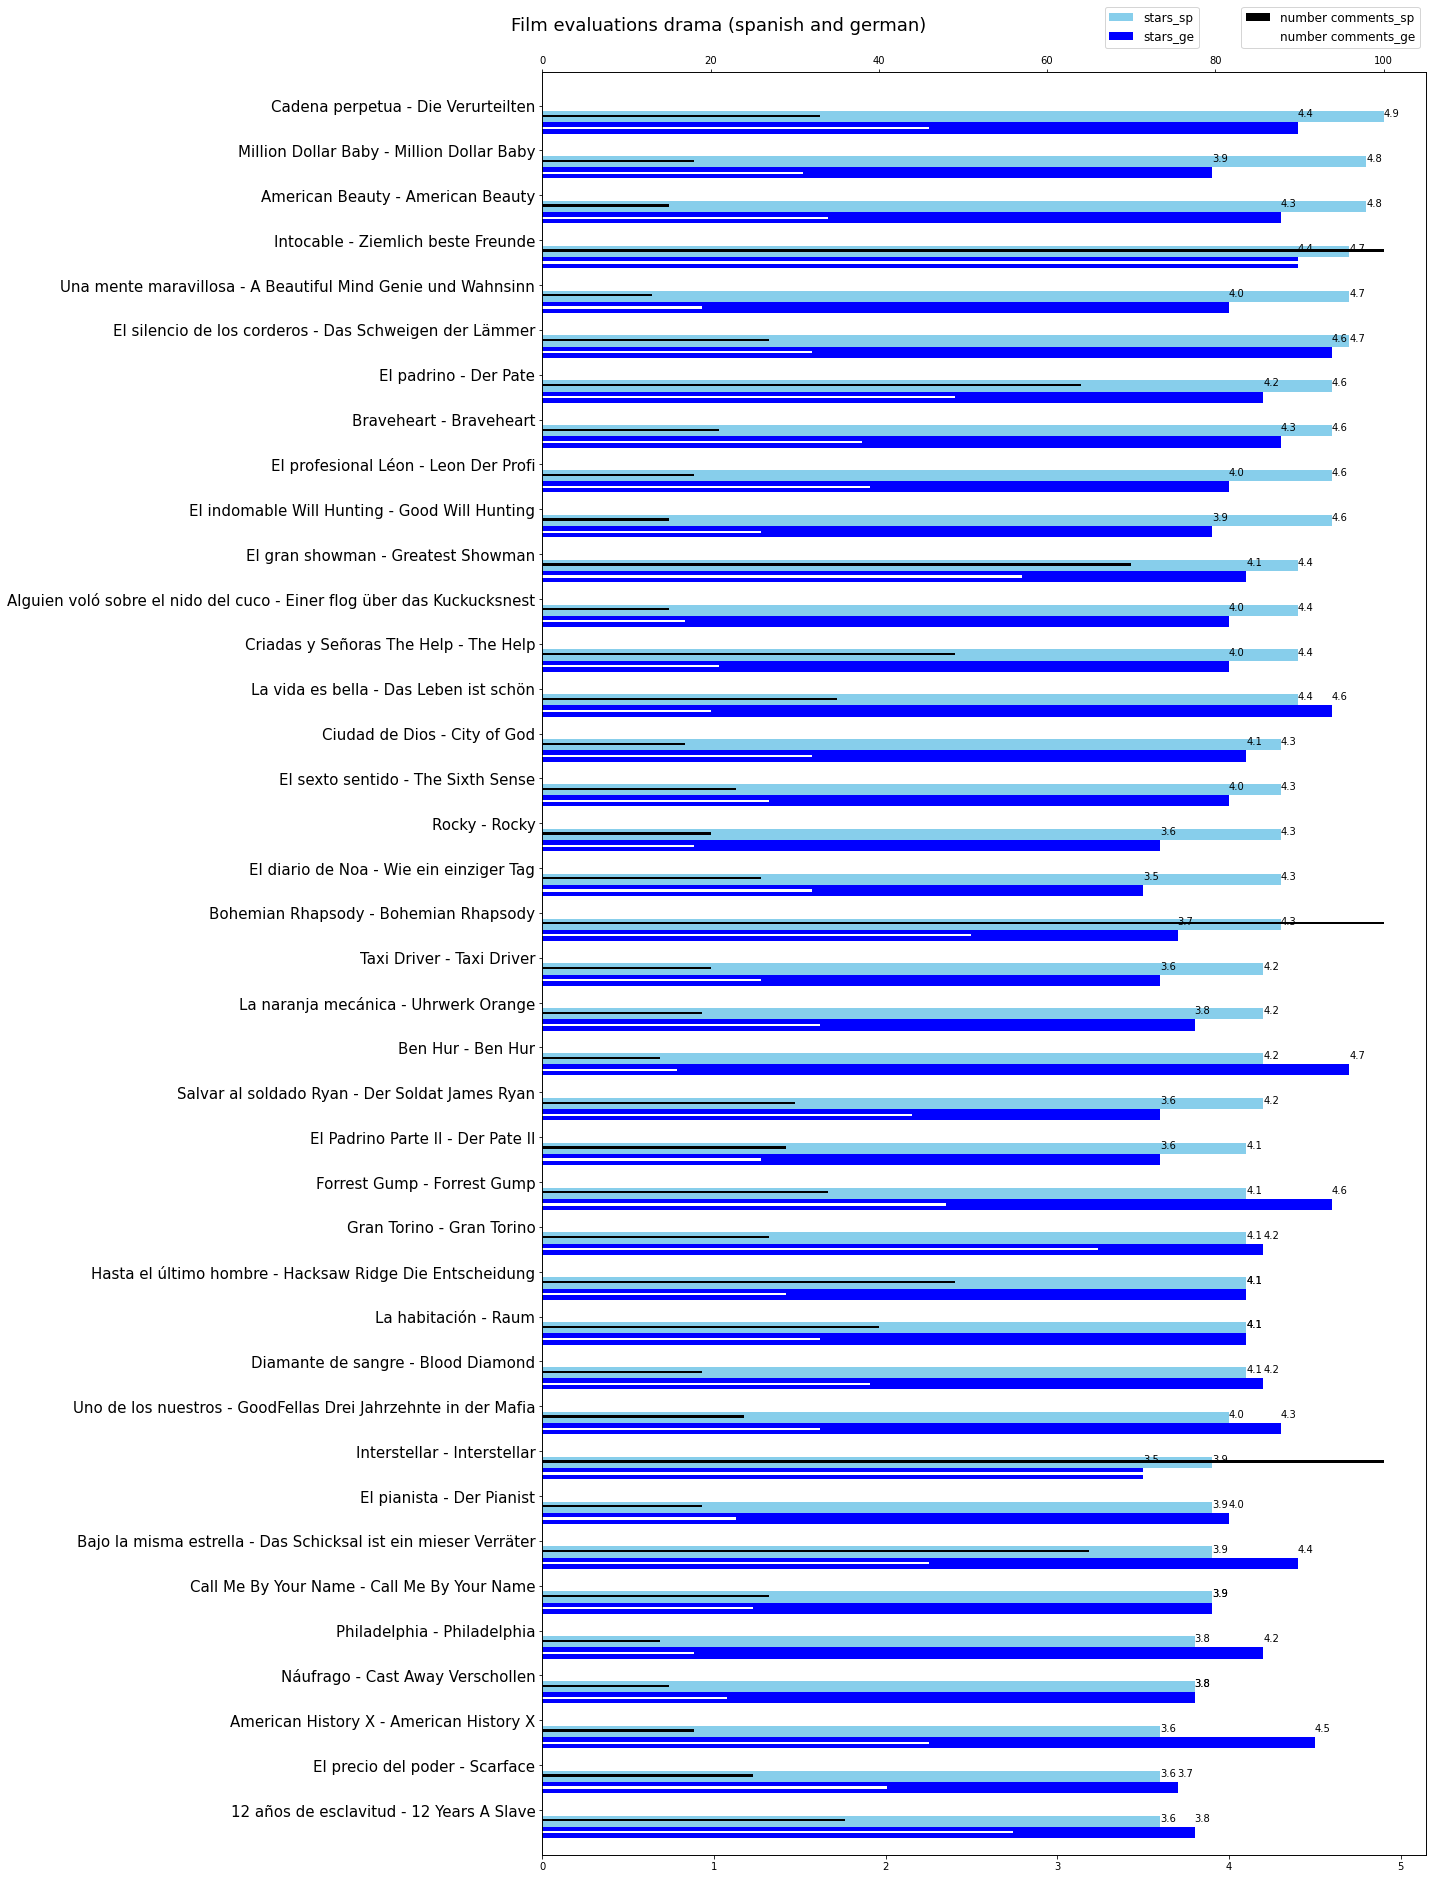

In [3]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


lista = df_drama_sp_ge.film_name_sp_ge.to_list()

ind = np.arange(len(df_drama_sp_ge))
width = 0.25

fig, ax = plt.subplots( figsize = (20,26))
ax.barh(ind, df_drama_sp_ge.stars_classifier_sp, width, color='skyblue', label='stars_sp')
ax.barh(ind - width, df_drama_sp_ge.stars_classifier, width, color='blue', label='stars_ge')
ax.set_title('Film evaluations drama (spanish and german)', fontsize = 18)
t = ax.title
t.set_position([0.2, 1.02])
ax.set(yticks=ind + width, yticklabels=df_drama_sp_ge.film_name_sp_ge, ylim=[width -1, len(df_drama_sp_ge)])

ax.legend(fontsize = 12, bbox_to_anchor=(0.75, 1.04))
ax.set_yticklabels(lista, fontsize = 15)
for index, value in enumerate(df_drama_sp_ge.stars_classifier.to_list()):
    plt.text(value, index, str(value))
for index, value in enumerate(df_drama_sp_ge.stars_classifier_sp.to_list()):
    plt.text(value, index, str(value))
    
width1 = 0.05
width2 = 0.25
width3 = 0.02
ax2 = ax.twiny()

ax2.set_ylabel('number of comments', fontsize = 20, color='red')  # we already handled the x-label with ax1
ax2.barh(ind + width3, df_drama_sp_ge.number_comments_sp, width1, color='black', label = 'number comments_sp')
ax2.barh(ind - width2, df_drama_sp_ge.number_comments, width1, color='white', label = 'number comments_ge')
ax2.tick_params(axis='y')
ax2.legend(fontsize = 12, bbox_to_anchor=(1.0, 1.04))

fig.tight_layout()
plt.savefig('charts/drama_evaluation_sp_ge.png')
plt.show()

In [4]:
f = 'df_comedy_sp_ge'
df_comedy_sp_ge = pd.read_csv(f'./df_evaluations_genre/{f}')
df_comedy_sp_ge['film_name_sp_ge'] = df_comedy_sp_ge['film_name.1'] + ' - ' + df_comedy_sp_ge['film_name']
df_comedy_sp_ge = df_comedy_sp_ge.rename(columns={'stars_classifier.1': 'stars_classifier_sp', 'number_comments.1':'number_comments_sp'})
df_comedy_sp_ge = df_comedy_sp_ge.sort_values('stars_classifier_sp', ascending=True)

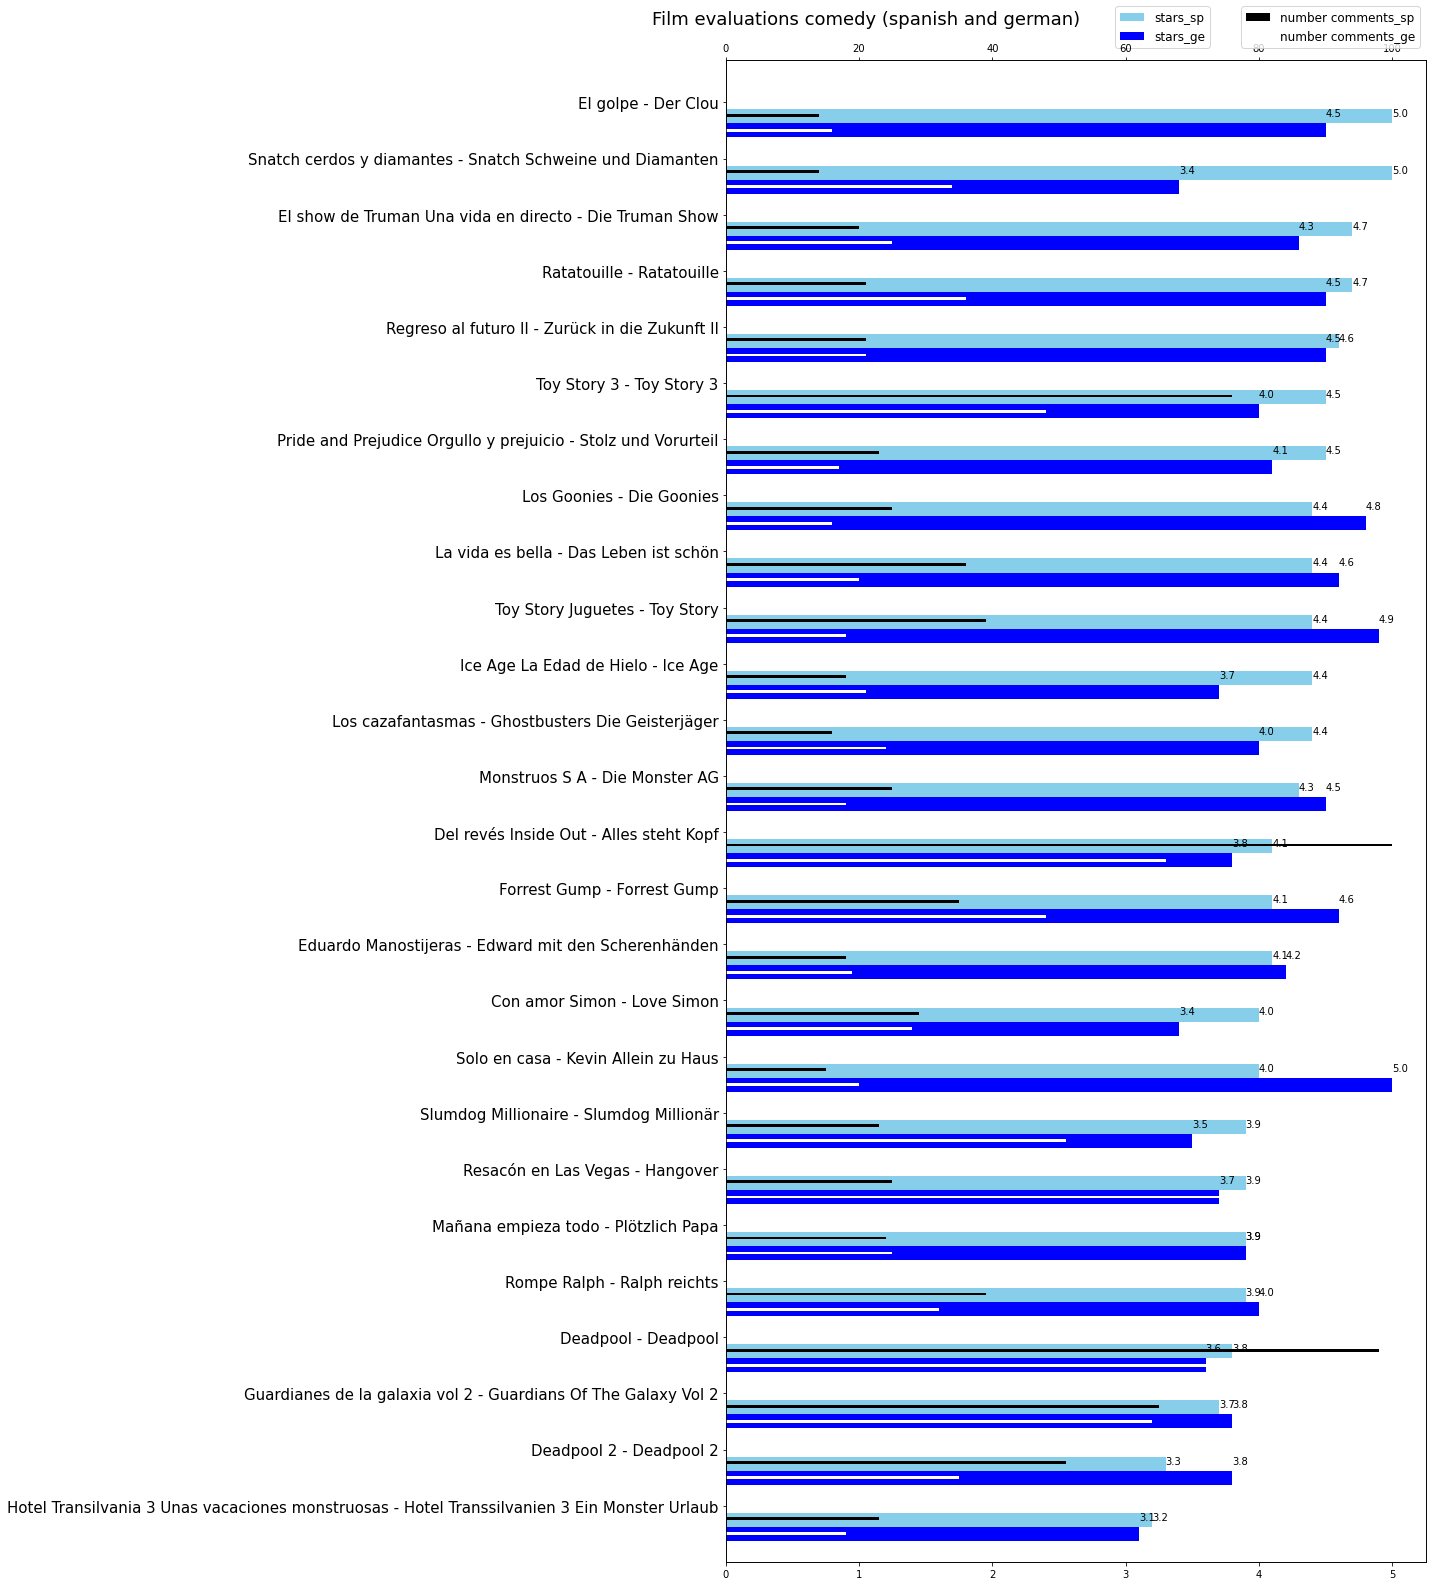

In [5]:
lista = df_comedy_sp_ge.film_name_sp_ge.to_list()

ind = np.arange(len(df_comedy_sp_ge))
width = 0.25

fig, ax = plt.subplots( figsize = (20,22))
ax.barh(ind, df_comedy_sp_ge.stars_classifier_sp, width, color='skyblue', label='stars_sp')
ax.barh(ind - width, df_comedy_sp_ge.stars_classifier, width, color='blue', label='stars_ge')
ax.set_title('Film evaluations comedy (spanish and german)', fontsize = 18)
t = ax.title
t.set_position([0.2, 1.02])
ax.set(yticks=ind + width, yticklabels=df_comedy_sp_ge.film_name_sp_ge, ylim=[width -1, len(df_comedy_sp_ge)])

ax.legend(fontsize = 12, bbox_to_anchor=(0.7, 1.04))
ax.set_yticklabels(lista, fontsize = 15)
for index, value in enumerate(df_comedy_sp_ge.stars_classifier.to_list()):
    plt.text(value, index, str(value))
for index, value in enumerate(df_comedy_sp_ge.stars_classifier_sp.to_list()):
    plt.text(value, index, str(value))
    
width1 = 0.05
width2 = 0.25
width3 = 0.02
ax2 = ax.twiny()

ax2.set_ylabel('number of comments', fontsize = 20, color='red')  # we already handled the x-label with ax1
ax2.barh(ind + width3, df_comedy_sp_ge.number_comments_sp, width1, color='black', label = 'number comments_sp')
ax2.barh(ind - width2, df_comedy_sp_ge.number_comments, width1, color='white', label = 'number comments_ge')
ax2.tick_params(axis='y')
ax2.legend(fontsize = 12, bbox_to_anchor=(1.0, 1.04))

fig.tight_layout()
plt.savefig('charts/comedy_evaluation_sp_ge.png')
plt.show()



In [6]:
f = 'df_action_sp_ge'
df_action_sp_ge = pd.read_csv(f'./df_evaluations_genre/{f}')
df_action_sp_ge['film_name_sp_ge'] = df_action_sp_ge['film_name.1'] + ' - ' + df_action_sp_ge['film_name']
df_action_sp_ge = df_action_sp_ge.rename(columns={'stars_classifier.1': 'stars_classifier_sp', 'number_comments.1':'number_comments_sp'})
df_action_sp_ge = df_action_sp_ge.sort_values('stars_classifier_sp', ascending=True)

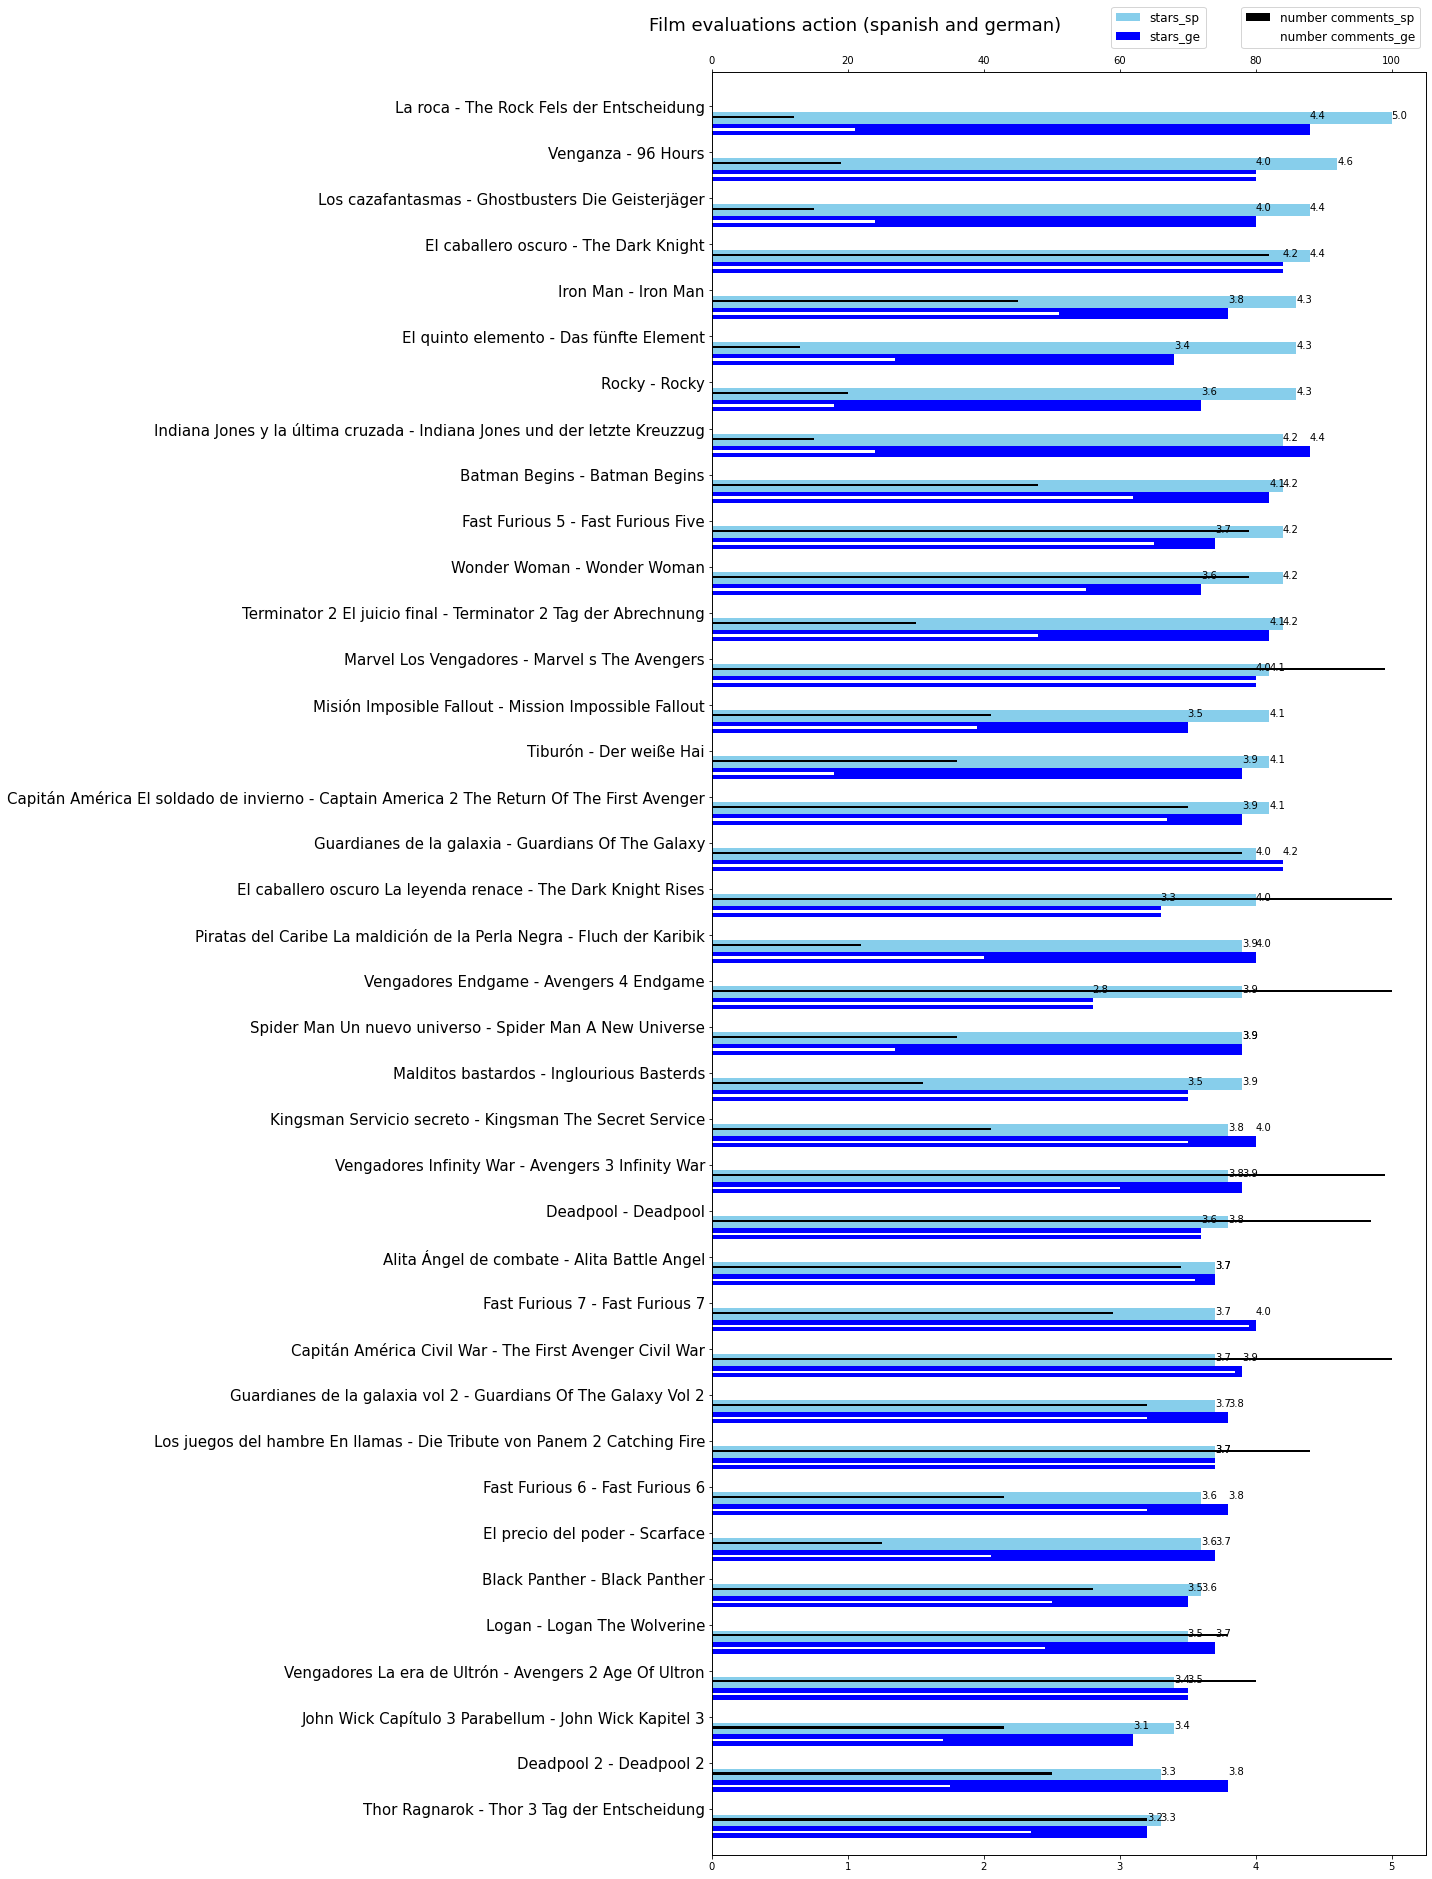

In [7]:
lista = df_action_sp_ge.film_name_sp_ge.to_list()

ind = np.arange(len(df_action_sp_ge))
width = 0.25

fig, ax = plt.subplots( figsize = (20,26))
ax.barh(ind, df_action_sp_ge.stars_classifier_sp, width, color='skyblue', label='stars_sp')
ax.barh(ind - width, df_action_sp_ge.stars_classifier, width, color='blue', label='stars_ge')
ax.set_title('Film evaluations action (spanish and german)', fontsize = 18)
t = ax.title
t.set_position([0.2, 1.02])
ax.set(yticks=ind + width, yticklabels=df_action_sp_ge.film_name_sp_ge, ylim=[width -1, len(df_action_sp_ge)])

ax.legend(fontsize = 12, bbox_to_anchor=(0.7, 1.04))
ax.set_yticklabels(lista, fontsize = 15)
for index, value in enumerate(df_action_sp_ge.stars_classifier.to_list()):
    plt.text(value, index, str(value))
for index, value in enumerate(df_action_sp_ge.stars_classifier_sp.to_list()):
    plt.text(value, index, str(value))
    
width1 = 0.05
width2 = 0.25
width3 = 0.02
ax2 = ax.twiny()

ax2.set_ylabel('number of comments', fontsize = 20, color='red')  # we already handled the x-label with ax1
ax2.barh(ind + width3, df_action_sp_ge.number_comments_sp, width1, color='black', label = 'number comments_sp')
ax2.barh(ind - width2, df_action_sp_ge.number_comments, width1, color='white', label = 'number comments_ge')
ax2.tick_params(axis='y')
ax2.legend(fontsize = 12, bbox_to_anchor=(1.0, 1.04))

fig.tight_layout()
plt.savefig('charts/action_evaluation_sp_ge.png')
plt.show()

